# Lecture Note: Time Value of Money

## By Albert S. (Pete) Kyle

## BUFN400---University of Maryland 


$\require{\newcommand}$
$\require{\newcommand}$
$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\e}{\mathrm{e}}$
$\newcommand{\drm}{\mathrm{\, d}}$
$\newcommand{\var}{\mathrm{var}}$
$\newcommand{\stdev}{\mathrm{stdev}}$
$\newcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\renewcommand{\mm}{{\scriptsize @}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$


## Introduction

Lectures on the time value of money typically begin with the idea that one dollar today is worth more than one dollar in the future.  While true for most times in the last 100 years, this statement is not always true.  In recent decades, Japan, Switzerland, the United States, and the Euro-zone have experience negative interest rates, allowing their central banks to borrow money on terms allowing them to pay back less than the nominal amount borrowed.

The concept of **time value of money** is correctly based on the idea than cash at different dates has different values.

This lecture will focus on the mathematics used to express the value of money at different dates: simple interest, compound interest, discount factors, yield-to-maturity, yield curve, and present value.

We will assume that the cash flows discussed are risk-free. Future lectures will focus on what happens when uncertainty (frequently called "risk") is added to the picture.

In [1]:
import os
GLOBAL_NUM_THREADS = "6"
os.environ["OMP_NUM_THREADS"] = GLOBAL_NUM_THREADS
os.environ["OPENBLAS_NUM_THREADS"] = GLOBAL_NUM_THREADS
os.environ["MKL_NUM_THREADS"] = GLOBAL_NUM_THREADS
os.environ["VECLIB_MAXIMUM_THREADS"] = GLOBAL_NUM_THREADS
os.environ["NUMEXPR_MAX_THREADS"] = GLOBAL_NUM_THREADS
os.environ["NUMEXPR_NUM_THREADS"] = GLOBAL_NUM_THREADS
os.environ["NUMBA_NUM_THREADS"] = GLOBAL_NUM_THREADS

import pandas as pd
import numpy as np
import scipy
import scipy.special
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt

import nbconvert

import sys
import datetime
import math
import string
import time
import timeit
import io
from pprint import pprint
import numba
import numexpr

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()


Python version 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.5.3
NumPy version 1.23.5
SciPy version 1.10.1
matplotlib version 3.7.1
Timestamp: 2023-0922-2345


## Ways to express interest rates as yields

Simple 360-day-year interest: Used for money market instruments.

Discount rates: Used for Treasury bills and commercial paper.

Bond-equivalent yield: Used for corporate and government bonds. Used six-month (semi-annual) convention.  Accrued interest on government bonds uses actual days as fraction of actual number of days in half-year, corrected for holiday and weekend effects.  Date calculations can be painstaking in Python and other languages because of many institutional details (holidays, leap-years).

Monthly interest rate: Used for mortgages.

Continuously compounded yield: used in modeling.  Why? more intuitive, arithmetic mean is easier than geometric mean.




## Simple Interest, Compound Interest, Continuously Compounded Interest, and Discount Rates

Finance researchers and practitioners use 4 different ways to keep track of interest rates:

1. Simple interest

2. Compound interest

3. Continuously-compounded interest

4. Discount rates

These are all different ways of dealing with the same problem: measuring the time value of money.

# Simple Interest

**Simple interest** means that interest is earned linearly, one day at a time, with the same amount of dollar interest earned each day.

Assume
$$
r_s = \text{interest rate} = 0.06 \text{ per year} = 6.00 \text{ percent per year},
$$

$$
m = \text{investment period} = 0.50 \text{ years (six month maturity)}, 
$$

$$
v_0 = \text{principal} = 100.00 \text{ dollars invested},
$$

$$
v_1 = \text{ principal plus interest earned},
$$

Then the definition of **simple interest** with **interest rate** $r$ is

$$ v_1 = v_0 \sm \left( 1 + m \sm r_s \right). 
$$

The **principal** invested is $v_0$, the interest earned is $r_s \sm m = v_1 - v_0$, and the **principal plus interest** is $v_1$.

In [2]:
rs = 0.06 
m = 0.50
v0 = 100.00
v1 = v0 * (1.00 + m * rs)
print(f"{rs=}, {m=}, {v0=}, {v1=}")

rs=0.06, m=0.5, v0=100.0, v1=103.0


## Advice: Keep in mind time units

When making calculations involving interest rates, it is important to keep in mind the units in which quantities are measured. An **interest rate** has time units (e.g., an annual interest rate of 4 percent per year). If you invest \\$100.00 at an interest rate of 4 percent per year for 6 months, the interest earned is 2 percent (a dimensionless quantitiy). The value of the interest is \\$2.00 (dollar units!). Thus, "interest" can have time units, no units, or dollar units, depending upon how it is used.

**Recommendation**: When working with interest rates, explicitly include a time period. Thus, the total return associated with a simple interest rate of 4 percent for a time period of $\Delta t = 6 \text{ months}$ can be written $R = 1 + r \sm \Delta t = 1 + 0.04 \sm 0.50 = 1.02$.  This says that investing \\$100.00 for 6 months at an simple interest rate of 4 percent per year multiplies the number of dollars by 1.02.  Note that $r$ has units of "per year" and $\Delta t$ has units of "years", so $r \Delta t$ is a dimensionless quantity.  Since the number 1 is also a dimensionless quantity, it makes sense to add the dimensionless quantities 1 and $r \sm \Delta t$.  The expression $1 + r$ does not make sense because $r$ has units of "per year" but 1 is dimensionless (and definitely does not mean one year!).
 
**Note**: Quantities with different units cannot be added or subtracted, but they can be multiplied or divided!


# Compound Interest

Compound interest differs from simple interest in that it allows interest to be earned on previously earned interest.

Let $N$ denote the number of compounding periods per year, such as:

1. For bonds, $N = 2$ is typical (**semi-annual compounding**).

2. For mortgages, $N = 12$ is typical (**monthly compounding**).

3. For investments rolled over from day to day (some **bank savings accounts**), $N=360$ or $N=365$ is typical (**daily compounding**).

Let $r_N$ denote the interest rate which is compounded $N$ times per year. Then initial principal $v_0$ grows to principal-plus-interest $v_1$ given by

$$
 \qquad \text{grows to} \qquad
v_1 = v_0 \sm (1 + r_N / N)^{N \sm m}.
$$

With different compounding frequencies $N$, the same quoted interest rate $r_N$ implies a different return on an investment. This formula remains valid even when $N \sm m$ is not an exact **integer**.
 

In [3]:
rn = 0.06
m = 0.50
v0 = 100.00
print(f"{rn=}, {m=}, {v0=}")
for n in [2, 12, 360, 365]:
    v1 = v0 * (1.00 + rn / n)**(n * m)
    print(f"{n=}, {v1=}")

rn=0.06, m=0.5, v0=100.0
n=2, v1=103.0
n=12, v1=103.03775093937651
n=360, v1=103.04519581065996
n=365, v1=103.04519933882668


##### Question for self-study

1. For what number of compounding periods $N$ does compound interest $R_N$ give the same result as simple interest $r_s$.

2. Is simple interest the same as compound interest in the numerical example in the cell above?

3. Confirm that compount interest works as expected when $N \sm m$ is not an exact integer.

# Continuously compounded interest ($\pmb{\mathrm{e}^{r t}}$)


Theoretically, interest can be compounded "continuously". Let $r_\infty$ denote the continuously compounded interest rate.

For arbitrary real number $x$, the formal mathematical definition of the **exponential function**, denoted $\mathrm{e}^x$ or $\exp(x)$, is

$$
\begin{aligned}
\mathrm{e}^x &:= \exp(x) \\
&= \sum_{k=0}^{\infty} \frac{x^k}{k!} \\
&= 1 + x + \frac{x^2}{2} + \frac{x^3}{3\sm 2} + ..., \\
\end{aligned}
$$

This function has an alternative definition which is more closely related to the time value of money:

$$
\mathrm{e}^x := \exp(x) 
:= \lim_{N \rightarrow \infty} \left( 1 + \frac{x}{N} \right)^N .
$$

If we change $x$ to $r_\infty \sm m$ and change $N$ to $N \sm m$, we obtain

$$
\begin{aligned}
\mathrm{e}^{r_\infty \sm m} &:= \exp(r_\infty \sm m)  \\
&:= \lim_{N \sm m \rightarrow \infty} \left( 1 + \frac{r_\infty \sm m}{N \sm m} \right)^{N \sm m} \\
&=  \lim_{N \rightarrow \infty} \left( 1 + \frac{r_\infty}{N} \right)^{N \sm m}.
\end{aligned}
$$

The last expression in the equation above is the limit of compound interest as the number of compounding periods per year becomes infinite. This limit defines **continuously compounded interest** in a both a mathematically and financially meaningful manner.

With continuously compounded interest, an investment $v_0$ grows to $v_1$ given by

$$
v_1 =  v_0 \sm \mathrm{e}^{r_\infty \sm m}.
$$

From a mathematical perspecitve, this formula is very "nice" due to its simplicity.  From a computational perspective, the exponential function is nice because it can be calculated quickly despite its seemingly complicated definition as an infinte series or limit as $N \rightarrow \infty$.

The exponential function has other nice mathematical properties, which make it popular for financial modeling, both by researchers and practitioners.


## Note on Exponential Growth: Rule of 72

It is often useful to be able to do arithmetic in your head. For example, it is a good way to find errors.

Suppose we would like to calculate $\mathrm{e}^{r \sm m}$ in our head. For example, how long does it take to double your money if invested at a rate of 6.00 percent per year? A rough estimate can be obtained by noting that that $\log(2) \approx 0.69314$.  For historical reasons, the approximation $\log(2) \approx 0.72$ is used because 72 has many exact divisors. Using the **rule of 72**, we can calculate the approximation $72 / 6 = 12$ years:

$$
1.06^{12} \approx \mathrm{e}^{0.06 \sm 12} = \mathrm{e}^{0.72} \approx 2.00 .
$$

I like to use the approximation $\log(2) \approx 0.70$, from which I estimate it takes $70/ 7 = 10$ years to double my money at 7.00 percent per year:

$$
1.07^{10} = \mathrm{e}^{0.07 \sm 10} = \mathrm{e}^{0.70} \approx 2.00 .
$$ 

Another useful fact to remember is that $2^{10} = 1024 \approx 10^3$.  What is the largest nonnegative integer which can be stored with *np.float32*, which uses 32 bits? The approximate answer is

$$
2^{32} = 2^{10 \sm 3} \sm 2^2 = (2^{10})^3 \sm 4 \approx 1000^3 \sm 4 = 4 \sm 10^9 = \text{4 billion} 
$$

How close are these estimates to more accurate calculations?

In [4]:
print(f"What is the natural logarithm of 2 (base e): {np.log(2.0)=} ~ 0.70 or 0.72?\n")
print(f"Rule of 72: At 6 percent rates, does dollar double in 12 years? {1.06**12=}\n{np.exp(0.06*12)=}\n")
print(f"Rule of 72 (70 version): At 7 percent, does a dollar doulbe in 10 years? {1.07**10=}\n{np.exp(0.07*10)=}\n")
print(f"Using 2**10~1000, is 2**32 approximately 4 billion: {2**32-1=}\n")  # counting starts at zero!
print(f"Is the largest 32-bit integer 2**32 - 1? {np.iinfo(np.uint32)=}")

What is the natural logarithm of 2 (base e): np.log(2.0)=0.6931471805599453 ~ 0.70 or 0.72?

Rule of 72: At 6 percent rates, does dollar double in 12 years? 1.06**12=2.0121964718355514
np.exp(0.06*12)=2.0544332106438876

Rule of 72 (70 version): At 7 percent, does a dollar doulbe in 10 years? 1.07**10=1.9671513572895665
np.exp(0.07*10)=2.0137527074704766

Using 2**10~1000, is 2**32 approximately 4 billion: 2**32-1=4294967295

Is the largest 32-bit integer 2**32 - 1? np.iinfo(np.uint32)=iinfo(min=0, max=4294967295, dtype=uint32)


### Question for Self Study (Easy)

In one short sentence, why is the largest representable 32-bit intege equal to $2^{32} - 1$ and not $2^{32}$?

# Discount Rates

Yet another approach for expressing the time value of money is the concept of **discount rate**. Discount rates are typically used to exprsee returns on loans with maturities of less than one year, such as **Treasury bills** and **commerial paper**.  

Instead of beginning with 100 dollars to invest and asking how much it will grow to over time, the concept of discount rate begins with $v_1 = 100$ dollars owed in the future and applies a linear discount to it to  determine how much $v_0$ can be borrowed now. Let $r_d$ denote the discount rate. Then

$$
v_0 = v_1 (1 - r_d \sm m).
$$

This implies that an initial investment of $v_0$ grows to $v_1$ given by

$$
v_1 = \frac{v_0}{1 - r_d \sm m}.
$$


In [5]:
rd = 0.06 
m = 0.50
v1 = 100.00
v0 = v1 * (1.00 - rd * m)
print(f"{rd=}, {m=}, {v1=}, {v0=}")

rd=0.06, m=0.5, v1=100.0, v0=97.0


In [6]:
rd = 0.06 
m = 0.50
v0 = 100.00
v1 = v0 / (1.00 - rd * m)
print(f"{rd=}, {m=}, {v0=}, {v1=}")

rd=0.06, m=0.5, v0=100.0, v1=103.09278350515464


## Problem for self-study

1. Study the following example to make sure that you understand Pandas syntax for creating simple dataframes.  This example does not use `np.datetime64` and `np.timedelta64` to keep track of time.

2. Use time-value-of-money formulas to change the missing values (`np.nan`) to their correct values.

3. Determine by experimentation whether the values in the column 'fv' increase monotonically for any constant values for 'days_in_year', 'maturity_in_days', and 'rate'.

4. If you change the inputs 'days_in_year', 'maturity', and 'rate', is the column 'fv' always monotonically increasing as you go down the column?

5. Note that maturity_in_years is obtained by dividing two integers. Verify what happens in Python and numpy when an integer is divided by an integer and "true division" would yield a result with a fraction but **integer division** (**floor division**) would yield an integer result? For example, do we obtain $1 / 2 = 0.50$ or $1 / 2 = 0$ (If you do not know the answer to this question, then you should both (1) cut-and-paste the question into google or Stackoverflow and (2) experiment and figure it out using Python 3.xx.)

In [7]:

days_in_year = 360
maturity_in_days = 180
rate = 0.06
v0 = 1000.00

#maturity_in_years = float(maturity_in_days) / float(days_in_year)  # casting not needed? check to make sure!
maturity_in_years = maturity_in_days / days_in_year

df = pd.DataFrame({'type' : ['simple interest'] + ['compound interest'] * 5 + ['discount rate'],
                   'freq' : ['N/A'] + [1, 2, 12, days_in_year, np.inf] + ['N/A'], # compounding frequency
                   'notation' : ['r0', 'r1', 'r2', 'r12', 'r' + str(days_in_year), 'rinf', 'rd'] ,
                   'days_in_year' : [days_in_year] * 7,
                   'maturity' : [maturity_in_days] * 7,
                   'rate' : [rate] * 7,
                   'maturity_in_days' : [maturity_in_days] * 7,
                   'maturity_in_years' :  [maturity_in_years] * 7,
                   'pv' : [v0] * 7,  # "present value", like v_0
                   'fv' : [np.nan] * 7})  # "future value", like v_1


df.loc[0, 'fv'] = df.loc[0, 'pv'] *  (1.00 + df.loc[0, 'rate'] * df.loc[0, 'maturity_in_years'])

display(df)


,type,freq,notation,days_in_year,maturity,rate,maturity_in_days,maturity_in_years,pv,fv
0,simple interest,N/A,r0,360,180,0.06,180,0.5,1000.0,1030.0
1,compound interest,1,r1,360,180,0.06,180,0.5,1000.0,NaN
2,compound interest,2,r2,360,180,0.06,180,0.5,1000.0,NaN
3,compound interest,12,r12,360,180,0.06,180,0.5,1000.0,NaN
4,compound interest,360,r360,360,180,0.06,180,0.5,1000.0,NaN
5,compound interest,inf,rinf,360,180,0.06,180,0.5,1000.0,NaN
6,discount rate,N/A,rd,360,180,0.06,180,0.5,1000.0,NaN


## Problem for self-study

1. Write out by hand the algebraic expression for the compound interest formula
$$
v_1 = v_0 \sm (1 + r / N)^{m N}
$$
for $m=1$ year, and $N = 1$, 2, 3, 4 compounding periods per year.  
For example, for $N=2$, you get
$$
v_1 = v_0 \sm \left(1 + 2 \sm \frac{r}{2} + \left(\frac{r}{2}\right)^2 \right).
$$
Can you interpret the terms as "principal", "interest", "interest on interest", etc.?

2. If you extend the interpretation to continuous compounding, what is the interpretation of the various terms in the power series expansion?

# Present Value and Future Value

In the above examples, finance professionals and researchers often refer to $v_0$ as the **present value** of an investment opportunity and refer to $v_1$ as the **future value** of the investment opportunity.  Using this notation, we call $v_1 / v_0$ the **future value of one dollar** and $v_0 / v_1$ as the **present value of one dollar**.

We can think of the present value of one dollar as the price of one dollar at a future date, measured in terms of current dollars. We call the present value of one dollar a **discount factor**.

The future value of one dollar is given by different mathematical expressions depending on which of the four ways of quoting interest rates is used

# Term Structure of Interest Rates

Interest rates vary across time and also vary across the maturity of the investment.  To emphasize this dependence, we can write $r(t_0, m)$, where $t_0$ is the date the investment is made, $m$ is time span or maturity of the investment, and $t_1 := t_0 + m$ is the maturity date. The discount factor $df(t_0, t_1)$ is the price at date $t_0$ of a **zero-coupon bond** with maturity $m := t_1 - t_0$, paying off one dollar at date $t_1$.

If we think of $r(t_0, m)$ as a function of maturity $m$, holding the date $t_0$ constant, we obtain a function of one varible.  We call the graph of this function a **term structure of interest rates** or **yield curve**.

The examples above show that different compounding frequencies give different mathematical formulas for discount factors measuring the present value of one dollar. The actual numbers used to describe the term structure of interest rates will therefore vary depending on the compounding frequency used.  To make the compounding frequency clear, we use subscripts: $r_s(t_0, m)$ for simple interest, $r_N(t_0, m)$ for compounding $N$ times per year, $r_\infty(t_0, m)$ for continuous compounding, and $r_d(t_0, m)$ for discount rates.

# Discount Factors as Market Prices

The discount factor $df(t_0, m)$ is the price at date $t_0$ of a **zero-coupon bond** with maturity date $t_1 := t_0 + m$, paying off one dollar at date $t_1$.

Using this notation, we can express discount factors as reciprocals of our previous formulas, adding the notation $t_0$ and $m$ to emphasize that interest rates depend on both the inital investment date $t_0$ and maturity date $t_0 + m$, in addition to depending on whether the calculations are based on simple interest, compound interest, continuously compounded interest, or discount rates, respectively:

$$
\begin{aligned}
df_s(t_0, m) &= \frac{1}{1 + r_s(t_0, t_1) \sm m},\\
df_N(t_0, m) &= \frac{1}{(1 + r_N(t_0, t_1) / N)^{m \sm N}},\\
df_\infty(t_0, m) &= \mathrm{e}^{-r_\infty(t_0, t_1) \sm m},\\
df_d(t_0, m) &= 1 - r_d(t_0, t_1) \sm m.
\end{aligned}
$$

Often we start with the discount factor and then want to calculate the interest rate corresponding to the discount factor.  Since the same interest rates give different future values for different compounding frequencies, the same discount factor will give different interest rates for the simple interest, compound interest, continuously compounded interest, and discount rates.  To obtain the interest rates from a given discount factor $df$, we need to invert our four formulas:

$$
\begin{aligned}
r_s(t_0, m) &= \frac{1 - df(t_0, m)}{df(t_0, m) \sm m} \\
\qquad
r_N(t_0, m) &= \left( \frac{1}{df(t_0, m)^{\frac{1}{N \sm m}}} - 1 \right) N \\
\qquad
r_\infty(t_0, m) &= \frac{-\log df(t_0, m)}{m} \\
\qquad
r_d(t_0, m) &= \frac{1 - df(t_0, m)}{m} 
\end{aligned}
$$

##  Interest rates derived from Discount Factors Have Two Uses: Quoting and Modeling

Given that discount factors and the interest rates derived from them are equivalent ways of converying the same economic and financial information, why do we need both interest rates and discount factors?

1. We need discount factors because they are prices (of dollars in the future expressed as a dimensionless ratio in terms of a dollar today). Prices are typically the most useful way to model financial and economic concepts.

2. Financial professionals need interest rates for two distinct purposes: **quoting** and **modeling**.

NB: In this discussion, "discount factor" means something different from "discount rate".  The discount factor does not have time units. If interest rates are positive, it is a monotonically decreasing function of maturity date $t_1$, given $t_0$. The "discount rate", simple interest rate, or compound interest rate, by contrast, all have time units and may be increasing, decreasing, or constant as functions of maturity date $t_1$ given $t_0$.


## Quoting

**Quoting** refers to the idea that interest rates (derived from discount factors) provide a convenient language for exprssing prices for assets which could also otherwise be expressed as discount factors. It is often inconvenient, non-intuitive, and error-prone to conduct trading by using discount factors or prices for dollars in the future. This was particularly the case historically, when trading was conducted by word of mouth by traders trying to keep track of market conditions in their heads.

1. Inconvenient: If all interest rates rise by the same amount, say 25 basis points, it is much easier to add 25 basis points to previously quoted interest rates than to re-calculate all of the discount factors which might be relevant for different compounding intervals and maturities, especially if you are doing it your head for making trades over a telephone.

2. Non-intuitive: If the discount factors for 90-day instruments change, converting the change into what it implies for other maturities might not be obvious if doing it in your head.

3. Error-prone: Some errors are associated with misunderstandings about maturity. If discount rates for different maturities are similar, fixing errors involving rates should require making only small changes.  But if errors are made in quoting discount factors, this might imply huge dollar errors, even if the discount rates are the same.  

When used for quoting, interest rates follow a **market convention** (generally understood language with precisely defined terms) about how to infer market prices from quoted rates.  In markets, the quoting conventions have historically been a mixture of simple interest, compounded interest, and discount factors, with continuously compounded rates less frequently. 

For both consumer products and institutional products, government regulatory agencies also impose standards on how terms of contracts are publicized and how returns are calculated.

## Homework problem for self-study

Suppose I am buying 91-day commercial paper in blocks of 10 million dollars. The discount rate (not discount factor) I should quote for 91-day paper is 3.02 percent, and the discount rate I should quote for 84-day commercial paper is 3.01 percent. I make the mistake of incorrectly quoting the discount rate for 84-day paper when I am actually buying 91-day paper. 

1. Am I overpaying or underpaying? By how many dollars do I overpay or underpay?

Now suppose I quote a discount factor (times 10 million dollars) for the price of 84-day paper when I am actually buying 91-day paper.

2. Am I overpaying or underpaying? By how many dollars do I overpay or underpay?

3. What issue does this problem illustrate?


## Modeling

For our purposes, let us define a **(zero-coupon) term structure model** or **(zero-coupon) yield curve model** as a function which maps maturities $m$ of zero-coupon bonds into continuously compounded interest rates $r(t_0, m)$ at a point in time $t_0$. 

Such functions are typically estimated from a market prices of fixed income securities. A small number of securities or a large number of securities may be used. If a large number of securities are used, securities with more **liquidity** may receive higher weight because their prices are deemed to be more reliable. Giving particular securities a higher weight means trying harder to make the model yield curve fit the market rate closely. Since we are defining a zero-coupon yield curve, we might give special emphasis to zero-coupon securities, but securities with coupons might be used as well, as we discuss below.

The yield-curve function itself might be defined in terms of a small number of parameters or a large number of parameters. 

It is convenient to express the yield curve as a theoretical function (or model-derived function) with a shape which is easy to define mathematically.

Here is an example expressing the yield curve as a function with a typical shape, in which the interest rate for short maturities is less than the interest rate for long maturities, the term structure is quite **flat** (nearly constant) for the longer maturities, and the yield curve is **monotonically upward sloping**.

The function is defined in terms of three parameters: a long rate `rlong`, a short rate `rshort`, and a mean reversion parameter `alpha`.  The three parameters are simplistically **packed** into a numpy array of length three to make the function convenient for later use. For example, we might later estimate the function's parameters using an algorithm from a Python package such as *scipy*. The algorithm may know about *numpy* arrays and expect numpy arrays as arguments to a function instead of a tuple of parameters. Of course, the algorithm may not know about long rates or short rates.

In a real-world model, the three parameters would be **estimated** from data on market interest rates. Here the three parameters are chosen a priori for purposes of illustrating yield curve shapes.

Practitioners often use intuitive interpretations of parameters to describe the shape of the yield cure.  For example, **level**, **slope**, and **curvature** are terms often use the describe the shape of the yield curve. Parameters describing level, slope, and curvature are oftern used to describe quadratic function. 

Study the code in the next cell carefully:

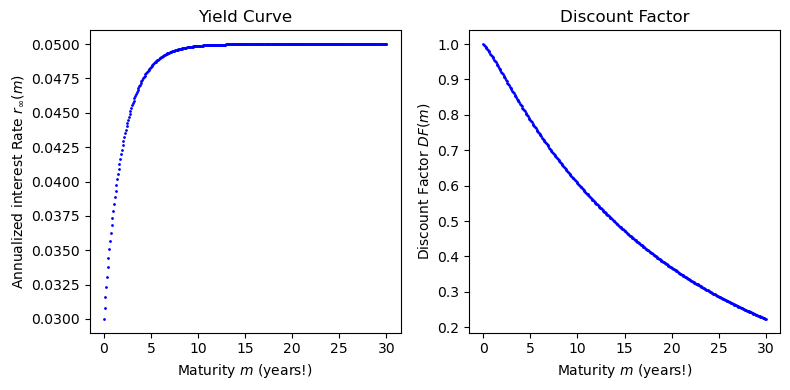

In [8]:
# This function defines the yield curve:
def fyc(m, parms):
    assert (type(parms) == np.ndarray and parms.shape == (3,)
           ), "Parameters parms should be a numpy array with three elements."
    # Parameters parms packed into numpy array for convenience in later use.
    # Unpack the parameters here so that they have intuitive names:
    rlong = parms[0]  # e.g., 0.0500
    rshort = parms[1] # e.g. 0.0300
    alpha = parms[2] #e.g. 0.50  # 1 / alpha = half-life of deviation from "long rate"
    
    # Now define the term structure function. 
    # NB: The np.exp function here not related to continuous compounding.
    r = rlong - (rlong - rshort) * np.exp(-alpha * m)  
    return r

# Construct a vector of parameters by defining the parameters a priori.
# (In a realistic application, these parameters would be estimated from data on securities prices)

rlong0 = 0.05
rshort0 = 0.03
alpha0 = 0.50
parms = np.array([rlong0, rshort0, alpha0])

# Plot the yield curve

mmax = 30.00 # years to plot on horizontal axis
nobs = 360 + 1 # The extra 1 makes the time between each observation equal to exactly one month.
m = np.linspace(start=0.00, stop=mmax, num=nobs, endpoint=True) # vector of maturities to plot
rm = fyc(m, parms) # vector of interest rates from yield curve

dfm = np.exp(-rm * m)  # continuously compounded discount factor for different maturities m

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(m, rm, 'bo', markersize=1.00)
ax[0].set_title("Yield Curve")
ax[0].set_xlabel("Maturity $m$ (years!)" )
ax[0].set_ylabel("Annualized interest Rate $r_\infty(m)$")

ax[1].set_title("Discount Factor")
ax[1].set_xlabel("Maturity $m$ (years!)")
ax[1].set_ylabel("Discount Factor $DF(m)$")
ax[1].plot(m, dfm, 'bo', markersize=1.00)

plt.tight_layout() # Prevents plots from being squashed together too much.

plt.show()


NB: The use of the exp function in defining the yield curve function `fyc` has nothing to do with continuously compounded interest rate.  The purpose of the exp function is to make the short rate gradually move toward the long rate for longer and longer maturities. Although we have in mind that the rate $r$ returned by the function is a continuously compounded rate, it might be some other rate, such as $r_2$ rather than $r_\infty$.  The function itself is ambiguous about both the time units for the maturity $mat$ (We have in mind years.) and what the quoted rate means ($r_2$ or $r_\infty$).  The appropriate units to apply to the function are based on how the function was constructed in the first place.

## Problem for self-study

1.  Consider the quadratic function $f(r) = \tfrac{1}{2} \sm c \sm r^2 + b \sm r + a$.  Can you explain some intuitive logic for how to map the parameters $a$, $b$, and $c$ into the concepts level, slope, and curvature? (There might be more than one way to do this.)

2. Now consider another way to define a quadratic function: $g(r) = b \sm (r - \bar{r}) + \tfrac{1}{2} \sm c \sm (r - \bar{r})^2$ in terms of three parameters $\bar{r}$, $b$, and $c$. Is this definition more intuitive for the purpose of discussing shapes of yield curves? (This is a subjective question, with not strictly correct or incorrect answer.)

## Notation and types for dates and time intervals

NB: In the yield curve above, the maturity `m` is a time interval expressed in years.  The years are hard-wired in the sense that Numpy is not keeping track of time units for us using `np.datetime64` or `np.timedelta64`.  Therefore, we must be careful to keep track of time units nonprogramatically.

In these notes, I will use notation like $t_0$, $t_1$ to indicated **dates** (which could be *np.datetime64*) and notation $m$ or $\Delta t$ to indicate **time intervals** defined as the difference between two dates (which  could be *np.timedelta64*): $m = t_1 - t_0$.  Althoug dates and time intervals could in principle be implemented with `np.datetime64` or `np.timedelta64`, the actual numpy types used are likely to be `np.float64` or `np.int64` for exact day counts. 

The term **maturity date** means the date at which a security matures, and **maturity** or **maturity horizon** means the time interval.  It would be meaningful to say, "The 30-year bond issued on November 15, 1982, had a maturity date of November 15, 2011, and had a maturity of 30 years when it was issued."

# Implied forward rates

## What does an "unchanging yield curve" mean?

If the yield curve is estimated at two different points in time, the estimated yield curves are likely to be different because interest rates fluctuate over time.

Modeling **stochastic** (i.e., **random**) time-varying interest rates is an interesting topic which takes us beyond the scope of this course.  It is a topic for a **derivatives** or **banking** course.

What does it mean for the yield curve to remain **unchanging** or **static** over time?  There are two ways to define this idea:

1. **Unchanging yield curve function**: It might mean that the function $f_{yc}^{model}(t, m)$ does not change when $t$ changes.  Mathematically, this means that for every maturity $m$, we have $f_{yc}^{model}(t_1) = f_{yc}^{model}(t_0)$. In words, if you estimate the same yield curve every day, then the graph of the yield curve $f_{yc}^{model}$ will not change. 

2. **Unchanging implied returns**: It might mean that returns on future investments are such that making a shorter-term investment at the current date $t_0$, then rolling over to another investment at a future date $t_1$ gives the same return as a longer-term investment at date $t_0$. 

### 1. Unchanging Yield-Curve function

When the yield curve itself is unchanging and defines different rates for different maturities, then returns for different investment strategies do change.

Suppose, for example, that the yield curve is **upward sloping** in the sense that long rates are higher than short rates. Than an investment strategy of investing in long-term securities is more profitable than a strategy of **rolling over** short-term investments. 

A strategy of **rolling over** very short-term investments results in a return equal to the short rate, but over a longer period of time.  This return is lower than what would have been achievedd by buying a bond with a longer maturity.

A strategy of making a series fo short-term investments in long-maturity bonds is likely the most profitable of all. As time passes, the maturity of a previously-bought fixed-income security shortens. If you buy a security with a maturity of ten years and hold it for a year, it will be a nine-year security at the end of the one-year holding period; its **maturity date** has not changed but its actual **maturity** has shortened. **Rolling over** refers to the idea of replacing the previous investment with a different one.  In this case, one might buy ten-you Treasury notes soon after issuance, hold them for a year---at which point in time they will be nine-year notes---then sell the nine-year notes and buy newly issued ten-year notes again. Regardless of how frequently the investments are rolled over, practitioners call this strategy **riding the yield curve**. The yield curve may not change, but returns on investing in different maturities are different.

A strategy of riding the yield curve can backfire if both long- and short-term interest rates increase.  If short-term interest rates increase, it becomes more profitable---in hindsight---to have rolled ove shorter maturity securities.  If long-term rates increase, the price of a long-term bond falls, so the investor experiences a capital loss.

Silicon Valley Bank (SVB) failes in 2023 as a result of riding the yield curve during a period when interest rates rose sharply. SVB invested in long-maturity U.S. Treasury securities and mortgage-backed securities.  It financed these investments with short-term deposits. When interest rates rose, the value of the long maturity securities fell and the cost of financing them rose. This would have wiped out the bank's capital if the capital were calculated based on market values of the long-dated securities.

### 2. Unchanging implied returns: implied forward rates and spot rates

In general, the returns from rolling over short-term investments is different from the returns on a long-term investment.

Consider three dates $t_0 < t_1 < t_2$ and two maturities $m_1 = t_1 - t_0$ and $m_2 = t_2 - t_1$. 

One way to invest one dollar is to purchase a long-maturity bond of maturity $m_1 + m_2$ at date $t_0$. 

Another way to invest one dollar at date $t_0$ is to purchase a bond of maturity $m_1$ at date $t_0$ then **roll over** the investment by purchasing a bond of maturity $m_2$ at date $t_1$. 

The returns on these two strategies are usually different.  In terms of continuously compounded interest rates, we usually have

$$
\mathrm{e}^{r(t_0, m_1 + m_2) \sm (m_1 + m_2)} \ne \mathrm{e}^{r(t_0, m_1) \sm m_1} \sm \mathrm{e}^{r(t_0 + m_1, m_2) \sm (m_2)}.
$$

The returns are typically different because the **future spot rate** $r(t_0 + m_2, m_2)$ is unknown at date $t_0$ and is typically either lower or higher than the specific rate which makes the returns the same.

Let us call the specific rate which does make the returns the same the **implied forward rate**, denoted $r_f(t_0, t_1, m_2)$, with $t_1 = t_0 + m_1$.

## Implied forward rate

The implied forward rate depends on information at date $t_0$ and also depends on the future date $t_1$ and maturity $m_2$ which the future spot rate $r(t_1, m_2)$ depends on.

It satisfies the equation

$$
\mathrm{e}^{r(t_0, m_1 + m_2) \sm (m_1 + m_2)} = \mathrm{e}^{r(t_0, m_1) \sm m_1} \sm \mathrm{e}^{r_f^{implied}(t_0, t_0 + m_1, m_2) \sm m_2}.
$$

Taking logs allows this equation to be written more simply:

$$
r(t_0, m_1 + m_2) \sm (m_1 + m_2) = r(t_0, m_1) \sm m_1 + r_f^{implied}(t_0, t_0 + m_1, m_2) \sm m_2.
$$

This equation can be rewritten in an intuitive form which says that the long rate is the maturity-weighted average of the current short rate and the implied forward rate:

$$
r(t_0, m_1 + m_2) 
= w_1 \sm r(t_0, m_1) + w_2 \sm r_f^{implied}(t_0, t_0 + m_1, m_2), 
$$

where

$$
w_1 := \frac{m_1}{m_1 + m_2}, \quad \text{and} \quad w_2 = \frac{m_2}{m_1 + m_2} \quad w_1 + w_2 = 1.
$$

Note that, mathematically, the long rate is a **weighted average** because the **weights** $w_1$ and $w_2$ are both positive and sum to one.

We can express the implied forward rate $r_f^{implied}(t_0, t_1, m_2)$, with $t_1 = t_0 + m_1$, as a function of the maturities and information about the yield curve at date $t_0$:

$$
r_f^{implied}(t_0, t_0 + m_1, m_2) = \frac{r(t_0, m_1 + m_2) \sm (m_1 + m_2) - r(t_0, m_1) \sm m_1}{m_2}.
$$

For a given date $t_0$, the implied forward rates define yield curves of future (spot) rates which, if realized, would make the returns on rolling over short-term investments, starting at date $t_0$, the same as returns on long-term investments.

The implied forward rates answers precisely the question, "What does the future spot rate $r(t_1, m_2)$ have to be in order to make returns on a strategy of buying a long maturity security the same as buying a short maturity security and rolling over to another short maturity security?"  It therefore defines what "unchanging implied returns" means.

## Instantaneous forward rate

Suppose that $m_2$ is a very short period of time. To emphasize this, change the notation $m_2$ to $\Delta m$.  Now the right side of the previous equation looks like a definition of the partial derivative of the function $r(t_0, m_1) \sm m_1$ with respect to the maturity $m_1$:

$$
r_f^{implied}(t_0, t_0 + m_1, \Delta m) = \frac{r(t_0, m_1 + \Delta m) \sm (m_1 + \Delta m) - r(t_0, m_1) \sm m_1}{\Delta m}.
$$

We call the limit as $\Delta m \rightarrow 0$ the **instantaneous forward rate**:

$$
r_f^{implied}(t_0, t_0 + m_1, 0) := \frac{\partial r(t_0, m_1)}{\partial m_1} \sm m_1 + r(t_0, m_1).
$$

When building a term structure model, researchers and practitioners often construct an instantaneous forward rate curve.

### Forward discount factor

We can also define a **forward discount factor** $df_f(t_0, t_1, m)$ by

$$
df_f^{implied}(t_0, t_0 + m_1, m_2) = \frac{df(t_0, m_1 + m_2)}{df(t_0, m_1)} .
$$

In markets, traders sometimes quote and trade forward rates. Using **forward contracts** whose terms involve forward rates, they allow traders to **lock in** interest rates at which they can borrow or lend in the future. In the retail context, one example of such a contract is a residential home buyer contractually **locking in** a rate on a mortgage by entering into a binding contract with a mortgage lender. In the institutional context, **foreign exchange markets** and **swaps markets** make extensive use of forward contracts.  

We can make a distinction between the actual forward rate quoted or traded in the market at date $t_0$, denoted $r_f(t_0, t_0 + m_1, m_2)$ and the implied rate $r_f^{implied}(t_0, t_0 + m_1, m_2)$.  If these rates are not equal, there is a potential arbitrage opportunity.  For example, this might imply that a dealer quoting a forward rate is locking in a profit margin for himself. The customer can estimate the dealer's **spread** or profit margin by comparing the quoted rate with implied rates based on a yield curve estimated from current market prices for securities.

# The Expectations Hypothesis of the term structure of interest rates

What is the relationship between current implied forward rates, which are known based on the current yield curve, and future spot rates, which are unknown and random based on current information?

It is natural to hypothesize that known implied forward rates can be interpreted as estimates of unknown future spot rates. The **expectations hypothesis** of the term structure of interest rates says, informally, that forward rates are equal to expected future spot rates. This hypothesis is a variation on the **efficient markets hypothesis**, which we will study later.

The expectations hypothesis, defined informally, makes sense only as an approximation. Defined formally, it is likely to be internally inconsistent. 

## (Optional) Why the expectations hypothesis may be internally inconsistent

(The discussion in this cell goes beyond the scope of this course.  It is a good topic for a derivatives course, where similar conceptual issues arise. )

Consider four dates $t_0 < t_1 < t_2 < t_3$. To conserve notation, let $R_{n m}$ denote the return on the asset from $t_n$ to $t_m$, $n < m$. For example $R_{0 1} = 1.0001$ means that the return from date $t_0$ to date $t_1$ is one basis point (slightly more than 3.65 percent annually with compounding). Now think of the time intervals between two consecutive dates as being one day, such a short time interval that the one-period **risk-free rate** (a safe interest rate, like on government securities) is **nonstochastic** (known or nonrandom). At date $t_0$, the one-day rate $R_{0 1}$, the two-day return $R_{0 2}$, and three-day return $R_{0 3}$ are known. The future rates $R_{1 2}$, $R_{1 3}$, and $R_{2 3}$ are unknown (e.g., because the Fed might unexpectedly raise rates on any day). All of these rates are returns on zero-coupon bonds.

An internally consistent definition of the expectations hypothesis says that the expected return from holding a risky asset for one day is the same as the known return on a safe asset for the same day. Use the notation $\mathrm{E}_n[\ldots]$ to mean "expectation given information at date $t_n$. Then the expectations hypothesis says

$$
\begin{aligned}
R_{0 2} &= R_{0 1} \sm \mathrm{E}_0[R_{1 2}], \\
R_{0 3} &= R_{0 1} \sm \mathrm{E}_0[R_{1 3}], \\
R_{1 3} &= R_{1 2} \sm \mathrm{E}_1[R_{2 3}].
\end{aligned}
$$

It follows from this that the expected return from holding a risky asset for a longer period of time than one day is the same as the expected (random) return from rolling over a safe overnight investment from one day to the next:

$$
R_{0 3} = R_{0 1} \sm \mathrm{E}_0[R_{1 2} \sm R_{2 3}].
$$

The expectations hypothesis becomes internally inconsistent when the expectations hypothesis is extended by adding the seemingly reasonable additional hypothesis that the expected return from holding a risky asset for several periods, then rolling over to another investment, is the same as holding a different risky asset for the entire period.  This adds the hypothesis

$$
R_{0 3} = R_{0 2} \sm \mathrm{E}_0[R_{2 3}].
$$

Here is the logic for the inconsistency.  Combine the previous equation with the one with $R_{0 2}$ on the right side to obtain

$$
R_{0 3} = R_{0 1} \sm \mathrm{E}_0[R_{1 2}] \sm \mathrm{E}_0[R_{2 3}].
$$

Now combine this with the equation $R_{0 3} = R_{0 1} \sm \mathrm{E}_0[R_{1 2} \sm R_{2 3}]$ to obtain

$$
R_{0 1} \sm \mathrm{E}_0[R_{1 2} \sm R_{2 3}] = R_{0 1} \sm \mathrm{E}_0[R_{1 2}] \sm \mathrm{E}_0[R_{2 3}],
$$

which implies (by canceling $R_{0 1}$ from both sides)

$$
\mathrm{E}_0[R_{1 2} \sm R_{2 3}] = \mathrm{E}_0[R_{1 2}] \sm \mathrm{E}_0[R_{2 3}].
$$

In words, the previous equation implies that, conditional on information at date $t_0$, returns from $t_1$ to $t_2$ are uncorrelated with returns from $t_2$ to $t_3$. In modeling equity returns, this hypothesis may be empirically reasonable (as an approximation) because it is empirically reasonable to assume that expected equity returns do not change much over time, even if unexpected returns vary randomly by large amounts.  In modeling fixed income returns, this hypothesis is internally inconsistent because it is empirically reasonable to assume that an unexpected increase in interest rates today likely implies higher interest rates and therefor higher expected returns in the future as well.  

Nevertheless, even though not internally consistent in this sense, this extended version of the expectations hypothesis is often seen in practice.  For example, the expectations hypothesis is often defined to say that the expected return from buying a two-year bond is equal to the expected return from rolling over two investments in one-year bonds.

This internal inconsistency becomes mathematically important in derivatives pricing of fixed income securities.







## Does the expectations hypothesis of the term structure of interest rates hold as an approximation?

As an empirical hypothesis about expected returns on safe fixed-income securities, there are several reasons to expcet that the expectations hypothesis does not hold:

1. Investors might prefer the predictability of rolling over short-term investments to holding longer term investments which might have to be sold at a loss before maturity.  This consideration leads to the hypothesis that short-term investments generally have lower expected returns than long-term investments.

2. Shorter term bonds are more **liquid** than longer term bonds in the sense that the costs of buying and selling them are lower. Therefore an investor contemplating potentially needing to sell an investment to raise cash might prefer more liquid, shorter term securities.  This is applicable to **asset managers**, **corporations**, and **central banks** (which hold foreign currencies as **reserves**.)

3. The so-called **preferred habitat theory** says that specific investors---for institutional, regulatory, risk managment, or public policy motives---might prefer investments with specific maturities.  For example, **life insurance** companies funding **annuities** (fixed periodic payments) for retirees who want fixed monthly incomes might prefer to invest in bonds with whose interest and principal payments correspond to the expected payments to retirees.  This might push long rates to levels making expected returns on short rates higher than long rates.

4. **Central banks** have in the past decade pursued policies of **quantitative easing** (**QE**), which involve massive purchases of bonds with relatively long maturities.  This drives the price of the bonds up and the returns on the bonds down, perhaps so far down that rolling over short-term bonds offers higher returns than holding long-term bonds. (The recent rapid increases in both long-term rates and short-term rates may illustrate this point.)



#### Comments and advice

The forward rates have three arguments related to time, $t_0$, $t_1$, and $m_2$. I have chosen to make the first two terms **dates** and the third term a **maturity**. Researchers and practitioners use different but equivalent ways to express the same idea.  For example, we could use three dates and write $r_f(t_0, t_1, t_2)$ or use one date and two maturities $r_f(t_0, m_1, m_2)$. These are all equivalent conceptually because the dates can be derived from the maturities and vice versa using $m_1 = t_1 - t_0$ and $m_2 = t_2 - t_1$. It is important to use consistent notation!

## Exercises for self-study

I have defined **implied forward rates** using continuously compounded returns.  It is also possible to define forward rates using returns compounded over various periods of time, such as semi-annually or per-month.

1. Using semiannual compounding (e.g., $r_2(t_0, m)$), derive equivalent version of the equations for forward rates in terms of the current yield curve.

As you will see when you do the above exercise, the algebra is much simpler using continuously compounded returns.  This results from mathematically "nice" properties of the $\exp(x)$ and $\log(x)$ functions.

2. Consider the specific Python yield curve function `fyc(m, parms)` defined above. Define a modified version of this Python function $fyc2(m, parms)$ which---instead of giving continuously compounded rates $r_\infty(m)$---gives semiannually compounded rates $r_2(m)$ such that the discount factors implied by both functions are exactly the same.

3. What is the instantaneous forward rate curve consistent with the curve defined by the Python function $fyc(m, parms)$?

4. (Optional, Harder) Verify that the instantaneous forward rate can also be defined as minus-the-derivative of the log of the discount factor.

# Uses of Term-Structure Models

What are term structure models used for?  Practitioners use them for many purposes:

If a security is not actively traded, the term structure model can give a **estimate** (or **prediction**) for what the security is worth at the date $t_0$.

These predictions have multiple usese:

1. The model values can be used for **trading**.  Asset managers can use them to determine whether a **market maker** is offering a reasonable price.  Market makers can use them to offer reasonable prices to customers.  They can be used to measure **trading costs** (difference between actual price paid and a more accurate, more favorable price better reflecting the asset's value). 

2. The model values can be used to **mark to market** assets in a portfolio, especially thinly traded ones. For example, a bank may use a term structure model to calculate **asset valuations** and **liability valuations** for the purpose of determining capital requirements.  This requires assigning prices to assets which may not have traded for a long time.

NB: If assets have and **active market** (the opposite of **thinly traded**), then the active market price is probably more useful than a model price.  Most good models will fit active market prices very accurately because the model will put a **high weight** on the the active assets in the **model estimation algorithm**.

3. When model-implied prices differ from market prices, there are two possible interpretations: (A) The model is incorrect and perhaps needs improving. (B) The market is mispricing the asset, and a potentially good trading opportunity is present.

If a model is too parsimonious, it may generate a model-implied yield curve which is too smooth and gives misleading prices for trading purposes.  If the model has too many parameters, it may fit every asset's price almost perfectly and say that there are potentially no good trading opportunities, even when good trading opportunities are present.

## The Term Structure Model Values Bonds with Multiple Cash Flows.

So far we have discussed **zero-coupon bonds**, defined as fixed-income securities with one cash flow payoff at maturity $m$ but not other cash flows.

A term structure model can be used to value fixed-income securities with multiple payoffs at different points in time.

Suppose a fixed-income security has cash flows $\mathbf{c} = (-p_0^{mkt}, c_1, c_2, \ldots, c_K)$ at dates $\mathbf{t} = (t_0, t_1, t_2, \ldots, t_K)$. The initial component $-p_0^{mkt}$ is the market price of a the security at date $t_0$. The price $-p_0^{mkt}$ has a minus sign because the price is a negative cash flow to the buyer at date $t_0$.

Notice that $c$ and $t$ can be thought of mathematically as vectors. In Python, they could be tuples (suggested by the notation), lists, or numpy arrays. 

The initial date at which the security is priced is $t_0$. For each date $t_k$, $k=1,2,\ldots$, we can define a time interval until payment $m_k = t_k - t_0$, then use the yield curve function to obtain the **model-implied interest rate** $r(\pi, m_k) = f_{yc}^{model}(\pi, m_k)$, where $\pi$ represents the parameters of the model (called `parms` in the definition of `fyc` above). From the model-implied interest rate $r(\pi, m_k)$, we calculate a **model-implied discount factor** $df^{model}(\pi, m_k) = \exp(-r^{model}(\pi, m_k) \sm m_k)$. Since the discount factor is the present value of one dollar, the present value of the $k$th cash flow $c_k$ is $df^{model}(\pi, m_k) \sm c_k$. 

Notice that "model" quantities are labeled with superscript "model", and the parameters `parms` in the example above are represented with $\pi$, which represents a vector of parameters.

To calculate the **model-implied present value** $p_0^{model}$ for the security itself, we simply add up the present value of all of its cash flows:

$$
\begin{aligned}
p_0^{model} &= PV_0^{model}(\pi, \mathbf{c}, \mathbf{t}) \\
&= \sum_{k=1}^K df^{model}(\pi, m_k) \sm c_k \\ 
&= \sum_{k=1}^K \textrm{e}^{-r^{model}(\pi, m_k) \sm m_k} \sm c_k \\ 
&= \sum_{k=1}^K \textrm{e}^{-f_{yc}^{model}(\pi, m_k) \sm m_k} \sm c_k.
\end{aligned}
$$

The **model-implied net present value** $NPV_0^{model}(\pi, \mathbf{c}, \mathbf{t})$ of the investment opportunity subtracts the cost of the investment from the present value of the cash flows:

$$
NPV_0^{model}(\pi, \mathbf{c}, \mathbf{t}) = PV_0^{model}(\pi, \mathbf{c}, \mathbf{t}) - p_0.
$$

The idea that securities can be valued by adding up the present value of their cash flows is very intuitive.  Mathematically, this idea is expressed by saying that the $PV^{model}$ function is a **linear function** of the cash flows.  In mathematical jargon, the present value function $PV^{model}$ is a **linear operator** which operates on cash flow vectors $\mathbf{c}$.  For this course, all you have to remember about linear operators is that they can often be implemented using an inner product of two vectors (or as a matrix-vector product for calculated many prices simultaneously).

In this example, the present value is expressed as a function of two types of arguments: (1) the model parameters $\pi$ (a vector with three elements in this case), and (2) a description of the security's cash flows, captured by the cash flow vector $\mathbf{c}$ and the date vector $\mathbf{t}$.


## Exercise for Self Study

In the algebra in the above cell (i.e., the equation defining model-implied present value), can you  find the inner product which implements the linear operator? (Hint: It is sitting in plain sight in the equations! If you cannot find it after a few minutes of looking, do not worry about it. It will be obvious later.)

## Why linearity? Arbitrage

Why is the function defining the present value linear? The answer has to do with **arbitrage**.

Suppose I own a portfolio of assets with zero-coupon bonds of all relevant maturities.

If the price of an asset is less than its present value, I can buy the asset and sell out of my portfolio a combination of zero-coupon bonds which have the same cash flows as the misvalued asset.  In this way I generate some up-front cash now because I have sold assets with greater value than the asset bought. In the future, my future cash flows are the same as they would be otherwise because the future cash flows on the asset bought exactly replace the future cash flows on the asset sold.  

If the price of an assset is greater than its present value, I can sell the asset out of my portfolio if I own it, then replace the asset with a cheaper combination of zero-coupon bonds generating the same future cash flows.

Regardless of whether the asset is too expensive or too cheap, its mispricing generates an **arbitrage opportunity**, defined as an opportunity to gain greater cash flows with not risk and not net cost. An investor exploits an arbitrage opportunity by replacing an overvalued asset with its cheaper **replicating portfolio** (portfolio with the same future cash flows) or by replacing a  replicating portfolio with an undervalued asset.

Economics suggests that competition among traders of financial assets will tend to eliminate such mispricing.  Of course, realistically, there are costs to having trading desks which search for and profit from arbitrage opportunities. Therefore, in practice, small arbitrage opportunities might exist. Exploiting such arbitrage arbitrage opportunities will generate enough pre-cost profit to pay for the trading infrastructure needed to exploit the arbitrage opportunities.



## Homework for self-study

Use the specific yield curve $fyc(\pi, m)$ to price a bond which has a 5 percent coupon and 10 year maturity, under the assumption that the bond pays coupons semi-annually (i.e., coupons are 2.5 percent of the par value of 100 every six months).  As an approximation, assume that the bond pays interest exactly every half-year (i.e., without precisely counting days between interest payments).



### Arbitrage Opportunities

An extreme case of a good trading opportunity is an **arbitrage opportunity**. 

There are two definitions of arbitrage opportunities: the theoretical definition which finance researchers use and the practical definition that traders use.

Finance researchers define an **arbitrage opportunity** as a configuration of asset prices such that buying a specific portfolio of assets and selling another specific portfolio of assets of equal total market value (so that cash receipts from the assets sold are exactly the amount needed to pay for the assets bought), generates positive cash flows at some date but generates negative cash flows at no dates.  The idea of an arbitrage opportunity is getting **something for nothing** (positive cash at some date---future or present---with no negative cash flow at any date). 

Some useful mathematical theorems come into play here:

Keep in mind that defining discount factors with the exp() function guarantees that the discount factors are positive because the exp function always evaluates to a positive number (for inputs which are **real**---not **complex**---numbers).  It does not, however, guarantee that the discount factors $df(m)$ are downward-sloping in $m$. The discount factors are downward sloping is all implied forward rates are non-negative.

Recent yield curves for U.S. dollars, Euros, Japanese yen, and Swiss francs hae sometimes had negative rates. I think it is reasonable to tighten the definition of arbitrage opporunity by allowing annualized rates to be slightly negative, say no more negative than $-1.00$ percent. This will reduce the number of trading opportunities which satisfy the definiton of an arbitrage opportunity. Adding slightly negative interest rates as a possibility is based on the idea that **storing money under a mattress** or **hoarding cash** is a possible investment opportunity, but storing cash has costs related to inconnvenience and keeping the cash secure.

1.  If there are no arbitrage opportunities available in the market for **risk-free** fixed income securities, then there exists a term structure model, with positive discount factors which are downward-sloping in $m$ (an either have non-negative implied forward rates or forward rates greater than $-1.00$ percent per year), which fits all of the securities prices **perfectly** (i.e., with zero error). While this term structure model defines **arbitrage-free** prices, it might not be the model a trader would want to use because it would have so many parameters that some good trading opportunities (which are not arbitrage opportunities) might not be identified.

2.  If there are arbitrage opportunities, then no model with positive discount factors will fit prices perfectly. Furthermore, the arbitrage opportunities will involve at least some assets which the model prices imperfectly.

Obviously, a real-world trader would want to take advantage of a significant arbitrage opportunity identified by a model which a researcher would like.  In addition, a real world trader would also want to take advantage of trading opportunities which look attractive but do not satisfy the strict criteria for being an arbitrage opportunity. Opportunistic trader are looking for trades with an attractive risk-return trade-off.  To find these, traders use models that are **parsimonious** enough that they do not fit all prices perfectly.

Real-world traders define **arbitrage** as **long-short trading** (buying some assets and selling or **selling short** others) which has small risk compared to the potential return.  This is different from the concept of **riskless arbitrage opportunities** that finance researchers, especially theorists, like.



## Optional: Computational convenience of exp() function

The exp() function is slower to evaluate than simple interest but much faster than compound interest.

To illustrate this, we can generate some random interest rates and maturities, then see how long it take to calculate the implied discount factors.

The **magic function** *%timeit* is useful for this purpose.


In [9]:
nobs = 10**5  # Number of observations
# Define a random number generator using numpy recommendation:
rng = np.random.default_rng()
# Generate random integers between 1 and 30 (years):
m = rng.integers(1, 30, nobs) + 0.01 * rng.standard_normal(nobs)
# Generate normally distributed random numbers (interest rates) with desired mean and variance:
r = (0.50 * rng.standard_normal(nobs) + 3.00) * 0.01

N = 2

# Calculate discount factors:
res0 = np.exp(-r * m)
res1 = 1 / ((1 + r / N)**(m * N))
res2 = np.exp(-np.log(1 + r / N) * (m * N))

print(f"{res0=}\n{res1=}\n{res2=}\n")

# Time speed of discount factor calculations:
print("\nTime to calculate simple interest:")
%timeit -r 7 -n 10 ress = 1 / (1 + r * m)
print("\nTime to calculate continuously compounded interest with exp function:")
%timeit -r 7 -n 10 res0 = np.exp(-r * m)
print("\nTime to calculate compound interest:")
%timeit -r 7 -n 10 res1 = (1 + r / N)**(-m * N)
print("\nTime to calculate compound interest using exp and log functions instead of power function:")
%timeit -r 7 -n 10 res2 = np.exp(-np.log(1 + r / N) * (m * N))

print(f"\nContinuously compounded interest is different from compound interest for {N} periods: \n{np.isclose(res1, res0).all()=}")

print(f"\nCalculating compound interest with exp and log functions gives same result as power function:\n{np.abs(res1-res2).max()=}, {np.isclose(res1, res2).all()=}")

res0=array([0.68817203, 0.74973772, 0.8371281 , ..., 0.45929351, 0.76140146,
       0.97315771])
res1=array([0.69015657, 0.75102269, 0.83822229, ..., 0.46205175, 0.76295925,
       0.97333533])
res2=array([0.69015657, 0.75102269, 0.83822229, ..., 0.46205175, 0.76295925,
       0.97333533])


Time to calculate simple interest:
358 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time to calculate continuously compounded interest with exp function:
1.1 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time to calculate compound interest:
5.75 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time to calculate compound interest using exp and log functions instead of power function:
2.46 ms ± 82.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Continuously compounded interest is different from compound interest for 2 periods: 
np.isclose(res1, res0).all()=False

Calculating compound interest with exp and log functions gives same r

## Problem for Self Study

Figure out what is going on in the code above.  Which line of output tells you how long it should take to calculate compound interest?

In [10]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} seconds")


Finished: timestamp = '2023-09-22 23:45:08'
Execution time = 2.078902200000001 seconds
